In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# Valores iniciales
w0 = 0.72  # Cintura del haz
m = 0   # Carga topológica

#Jones
H = np.array([[1], [0]])
V = np.array([[0], [1]])
d = (1 / np.sqrt(2)) * np.array([[1], [1]])
a = (1 / np.sqrt(2)) * np.array([[1], [-1]])
R1 = (1 / np.sqrt(2)) * np.array([[1], [1j]])
L = (1 / np.sqrt(2)) * np.array([[1], [-1j]])

In [81]:
#Función para cálculo del campo
def E(x, y):
    return ((np.sqrt(x**2+y**2) / w0) ** abs(m)) * np.exp(-np.sqrt(x**2+y**2) ** 2 / w0 ** 2) * np.exp(1j * m * np.arctan2(y, x))

In [82]:
# Generación de la Malla
x = np.linspace(-2, 2, 1024)    
y = np.linspace(-2, 2, 1024)   
X, Y = np.meshgrid(x, y)     

# Campo óptico
E_field = E(X, Y)
E_intensity = np.abs(E_field)**2
I_max = np.max(E_intensity)

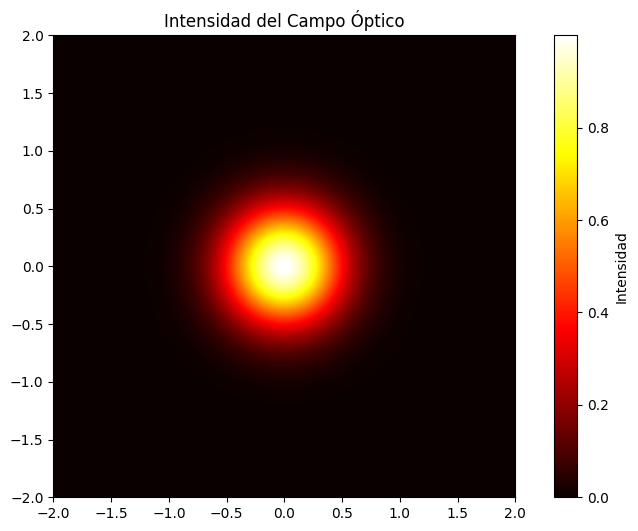

In [83]:
# Plot de la intensidad del campo óptico incial
plt.figure(figsize=(10, 6))
plt.imshow(E_intensity, cmap='hot', extent=(-2, 2, -2, 2))
plt.title('Intensidad del Campo Óptico')
plt.colorbar(label='Intensidad')

In [84]:
def Polarizador(Ex,Ey,theta):
    A = np.cos(theta)**2
    B = np.sin(theta)*np.cos(theta)
    C = np.sin(theta)*np.cos(theta)
    D = np.sin(theta)**2
    return A*Ex + B*Ey, C*Ex + D*Ey

#Función para el cálculo de la intensidad
def Intensidad(Ex,Ey):
    return np.abs(Ex)**2 + np.abs(Ey)**2

def Integra(dx,dy,A):
    area_per_element = dx * dy
    return np.sum(A) / area_per_element

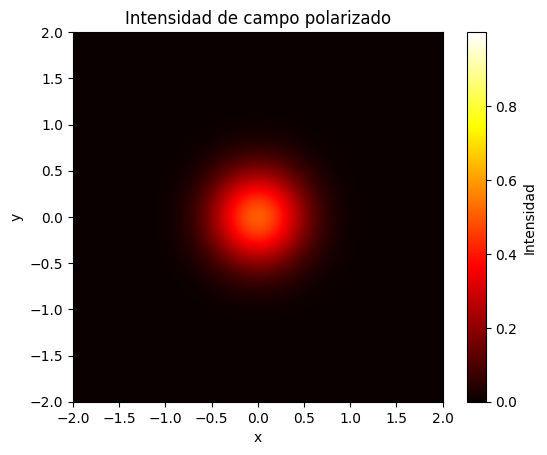

In [85]:
EX =  E_field * H[0]
EY =  E_field * H[1]   

E_P = Polarizador(EX,EY,np.pi/4)
I = Intensidad(E_P[0],E_P[1])

plt.imshow(I, cmap='hot', interpolation='nearest',extent =[x.min(), y.max(), x.min(), y.max()],vmax=I_max)
plt.colorbar(label='Intensidad')
plt.title('Intensidad de campo polarizado')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


In [86]:
def gira_pol(Ex, Ey, dx, dy, theta):
    
    I_p=np.zeros(len(theta))
    
    for i in range(len(theta)):
        E_p=Polarizador(Ex,Ey, theta[i])
        I=Intensidad(E_p[0],E_p[1])
        I_p[i]=Integra(dx,dy,I)
    return I_p


In [87]:
theta=np.arange(0, 2*np.pi, 0.01)
dx,dy=0.01,0.01
I_pol_rot=gira_pol(EX,EY,dx,dy,theta)

In [88]:
I0=Integra(dx,dy, E_intensity)
I_malus=I0*(np.cos(theta)**2)

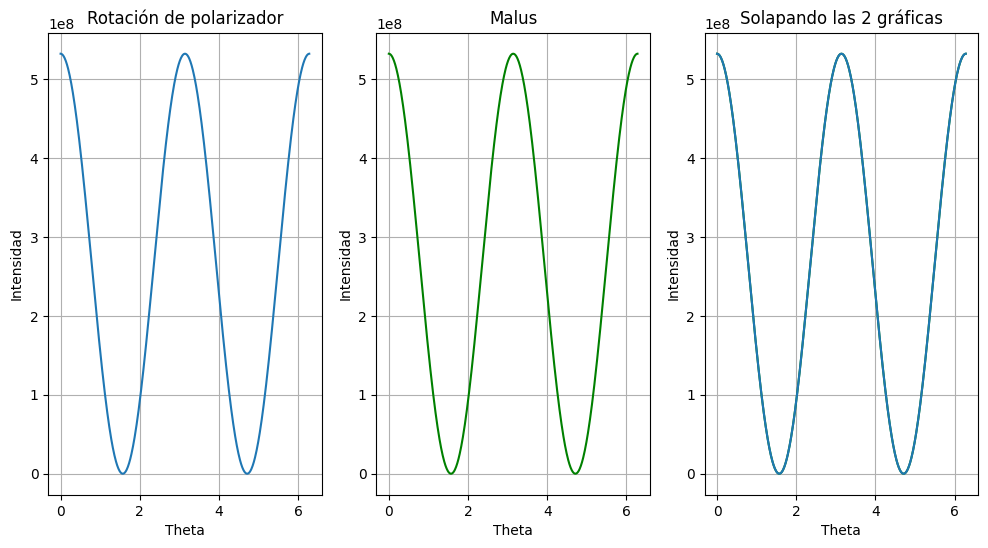

In [89]:
plt.figure(figsize=(12, 6))

plt.subplot(1,3,1)
plt.plot(theta,I_pol_rot)
plt.xlabel('Theta')
plt.ylabel('Intensidad')
plt.title('Rotación de polarizador')
plt.grid()

plt.subplot(1,3,2)
plt.plot(theta,I_malus,color='green')
plt.xlabel('Theta')
plt.ylabel('Intensidad')
plt.title('Malus')
plt.grid()

plt.subplot(1,3,3)
plt.plot(theta,I_malus,color='green')
plt.plot(theta,I_pol_rot)
plt.xlabel('Theta')
plt.ylabel('Intensidad')
plt.title('Solapando las 2 gráficas')
plt.grid()

# Retardador

In [90]:
#Generando polarización vertical
EX=E_field*V[0]
EY=E_field*V[1]

In [91]:
def retardador_lam_4(Ex,Ey, theta):
    A=1/np.sqrt(2) *(1-1j*np.cos(2*theta))
    B=1/np.sqrt(2) *(-1j*np.sin(2*theta))
    C=1/np.sqrt(2) *(-1j*np.sin(2*theta))
    D=1/np.sqrt(2) *(1+1j*np.cos(theta)*np.sin(theta))
    return A*Ex+B*Ey, C*Ex+D*Ey

def retardador_lam_2(Ex,Ey,theta):
    A = np.cos(2*theta)
    B = np.sin(2*theta)
    C = np.sin(2*theta)
    D = -np.cos(2*theta)
    return A*Ex + B*Ey, C*Ex + D*Ey

In [92]:
E_R=retardador_lam_4(EX,EY,np.pi/4)
E_P=Polarizador(E_R[0], E_R[1], np.pi/2)
I_RP=Intensidad(E_P[0],E_P[1])

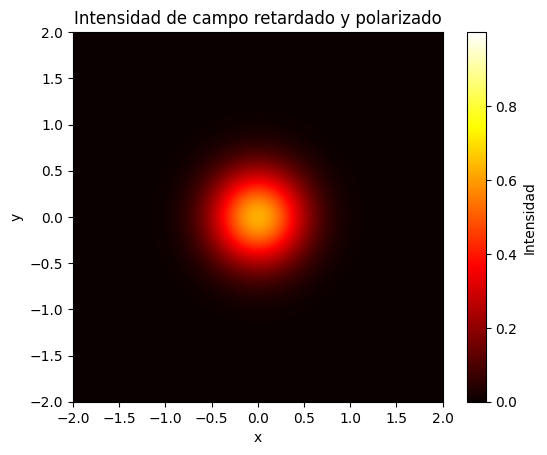

In [93]:
plt.imshow(I_RP, cmap='hot', interpolation='nearest',extent =[x.min(), y.max(), x.min(), y.max()],vmax=I_max)
plt.colorbar(label='Intensidad')
plt.title('Intensidad de campo retardado y polarizado')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

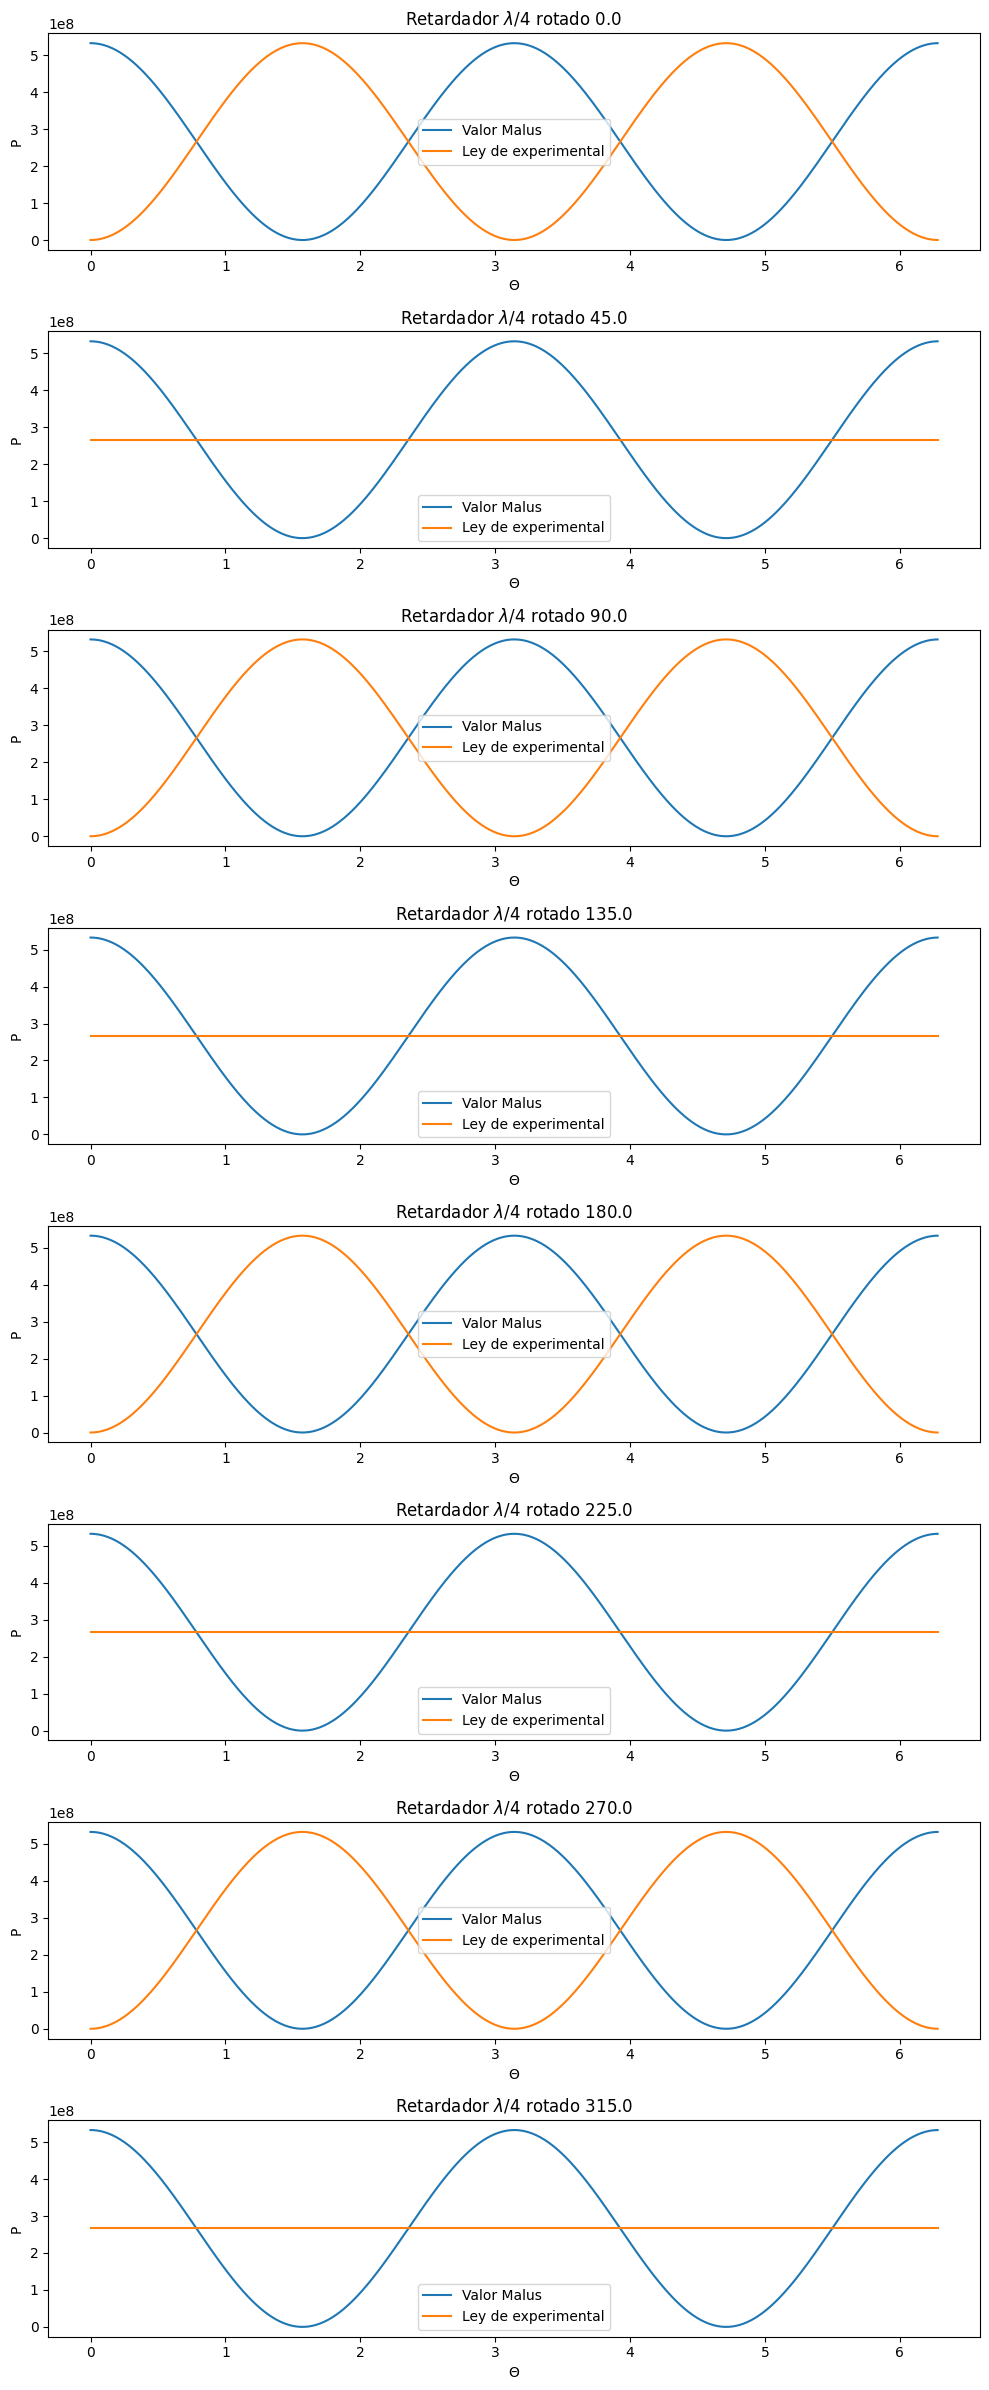

In [94]:
def Retardador_L_4(Ex,Ey,angulo):
    Exnew = 1/np.sqrt(2)*(Ex*(1-1j*np.cos(2*angulo)) + Ey*(-1j*np.sin(2*angulo)))
    Eynew = 1/np.sqrt(2)*(Ex*(-1j*np.sin(2*angulo)) + Ey*(1+1j*np.cos(2*angulo)))
    return Exnew, Eynew

phi = np.arange(0,2*np.pi,np.pi/4)
E_x = EX
E_y = EY
P0 = Integra(dx,dy,E_intensity)

#Crear la figura y los subplots
n = len(phi)
fig, axs = plt.subplots(n, 1, figsize=(10, n*3))  # Adjust the figure size as needed

for i in range(len(phi)):
    theta = np.arange(0,2*np.pi,0.01)
    ExR,EyR = Retardador_L_4(E_x,E_y,phi[i])
    I_teorico = P0 * np.cos(theta)**2
    I_experimental =gira_pol(ExR,EyR,dx,dy,theta)

    axs[i].plot(theta, I_teorico, label = 'Valor Malus')
    axs[i].plot(theta, I_experimental, label = 'Ley de experimental')
    axs[i].set_title(f'Retardador $\lambda/4$ rotado {phi[i]*180/np.pi}')
    axs[i].set_xlabel('$\Theta$')
    axs[i].set_ylabel('P')
    axs[i].legend()
    plt.grid()

plt.tight_layout()  
plt.show()

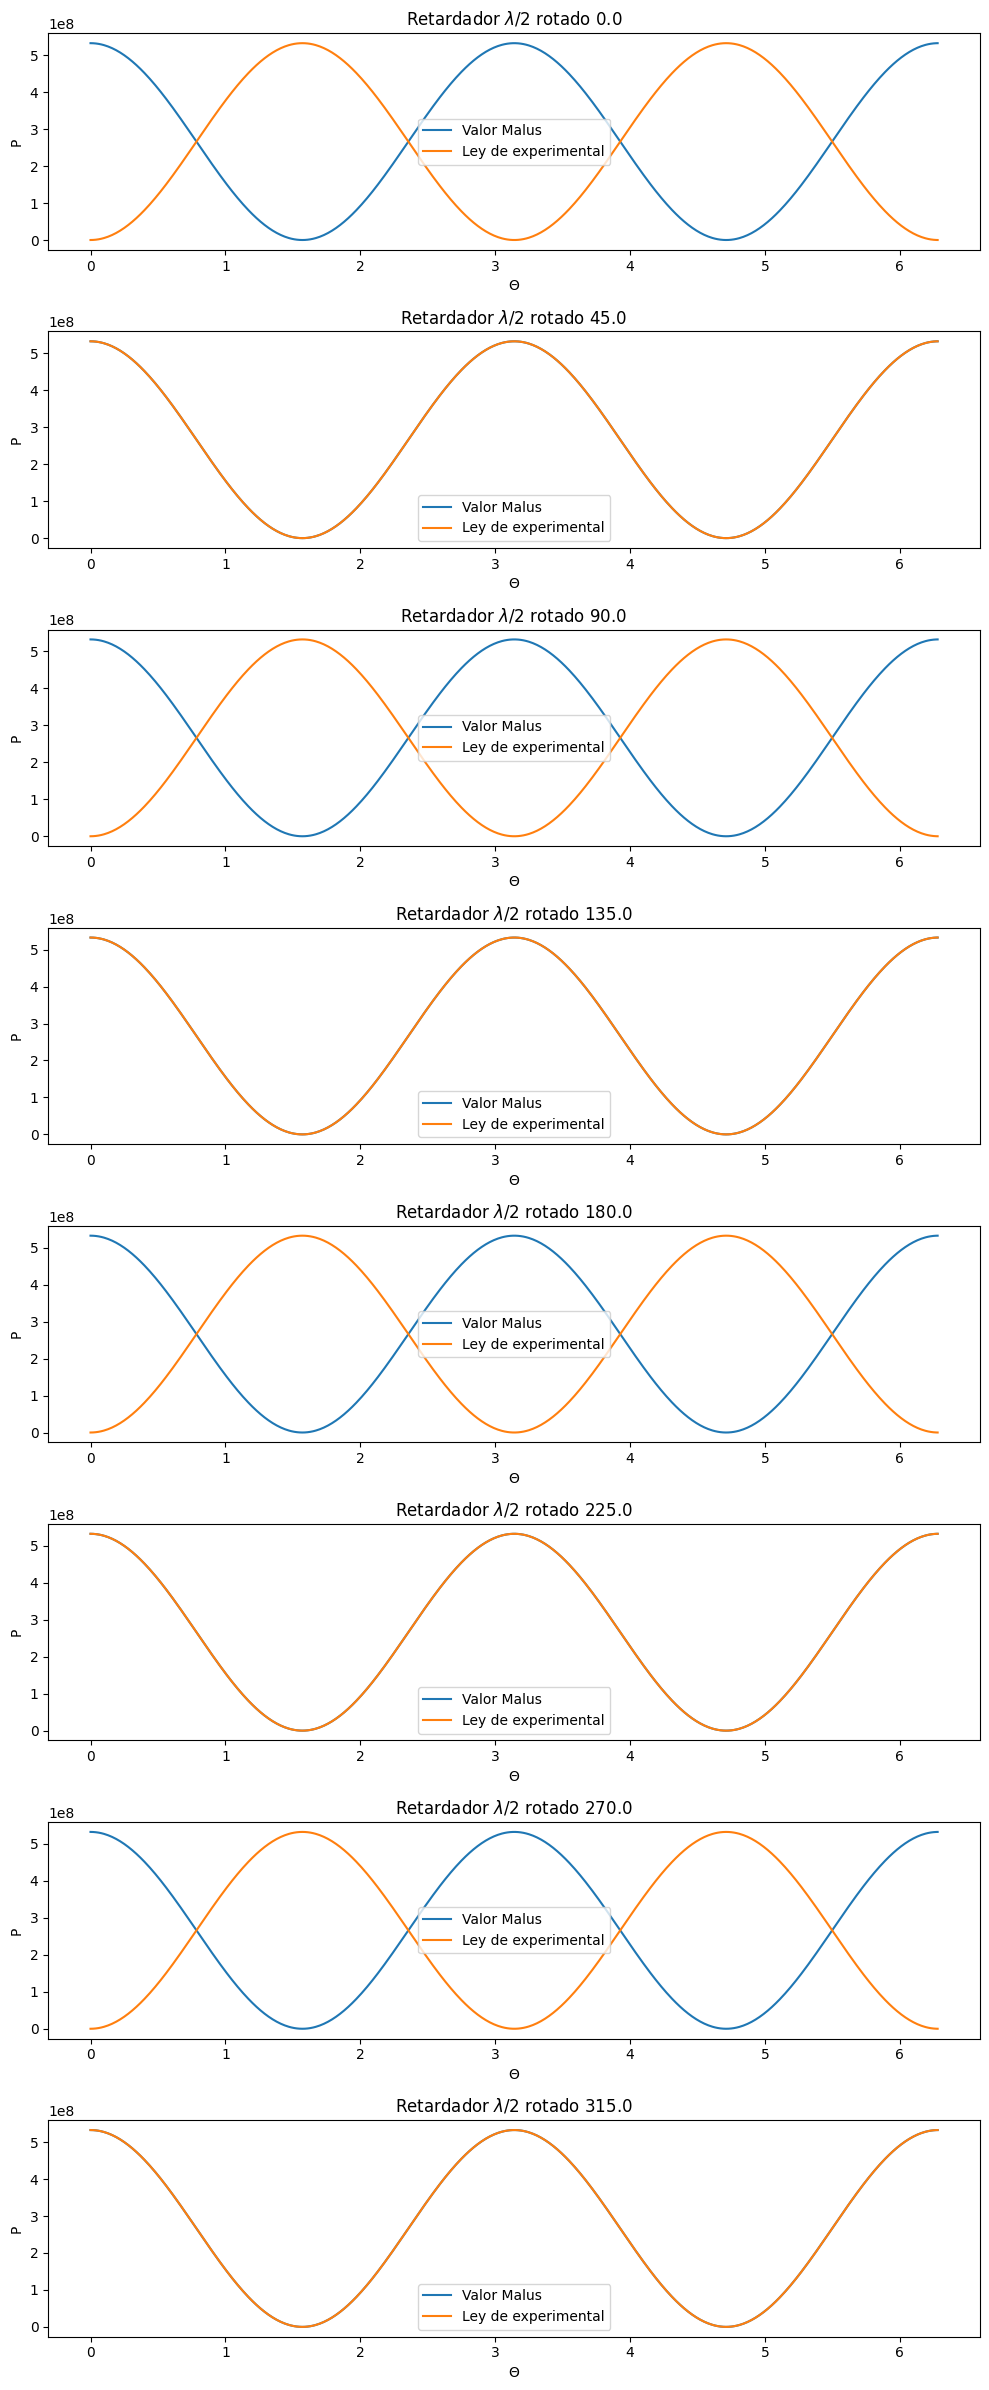

In [95]:
phi = np.arange(0,2*np.pi,np.pi/4)
E_x = EX
E_y = EY
P0 = Integra(dx,dy,E_intensity)

#Crear la figura y los subplots
n = len(phi)
fig, axs = plt.subplots(n, 1, figsize=(10, n*3))  # Adjust the figure size as needed

for i in range(len(phi)):
    theta = np.arange(0,2*np.pi,0.01)
    ExR,EyR = retardador_lam_2(E_x,E_y,phi[i])
    I_teorico = P0 * np.cos(theta)**2
    I_experimental =gira_pol(ExR,EyR,dx,dy,theta)

    axs[i].plot(theta, I_teorico, label = 'Valor Malus')
    axs[i].plot(theta, I_experimental, label = 'Ley de experimental')
    axs[i].set_title(f'Retardador $\lambda/2$ rotado {phi[i]*180/np.pi}')
    axs[i].set_xlabel('$\Theta$')
    axs[i].set_ylabel('P')
    axs[i].legend()
    plt.grid()

plt.tight_layout()  
plt.show()

# Stokes

## Añadiendo retardador de lambda medios

In [96]:
def calcular_s(angulo):
    s = Polarizador(E_R[0], E_R[1], angulo)
    I_s = Intensidad(s[0], s[1])
    P_s = Integra(dx, dy, I_s)
    return P_s

def calcular_s_RP(angulo1, angulo2):
    E_R_b = retardador_lam_2(E_R[0],E_R[1],angulo1)
    E_RP = Polarizador(E_R_b[0], E_R_b[1], angulo2)
    I_s = Intensidad(E_RP[0], E_RP[1])
    P_s3 = Integra(dx, dy, I_s)
    return P_s3

In [97]:
# Generación de la Malla
x = np.linspace(-2, 2, 1024)    
y = np.linspace(-2, 2, 1024)   
X, Y = np.meshgrid(x, y)     

# Campo óptico
E_field = E(X, Y)

# Calcula E_x, E_y y E_R
E_x, E_y = E_field * H[0], E_field * H[1]
E_R = retardador_lam_4(E_x, E_y, np.pi/4)

#Realizando mediciones
s0_a = calcular_s(0)
s0_b = calcular_s(np.pi/2)

s1_a = calcular_s(0)
s1_b = calcular_s(np.pi/2)

s2_a = calcular_s(np.pi/4)
s2_b = calcular_s(-np.pi/4)

s3_a = calcular_s_RP(0, np.pi/4)
s3_b = calcular_s_RP(0,-np.pi/4)

# Suma las componentes para obtener s0
s0 = s0_a + s0_b
s1 = s1_a - s1_b
s2= s2_a - s2_b
s3= s3_a - s3_b

print(s0, s1, s2, s3)

532618357.97235566 0.0 0.0 0.0
